In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import env
import dataprep

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from scipy import stats
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [49]:
df = dataprep.get_zillow_data()
df = dataprep.wrangle_zillow() 
#import dataprep function from dataprep.py.

Using cached csv


In [4]:
df.head(2)#check the head to see all rows. 

,parcelid,bathrooms,bedrooms,area,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,year_built,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura


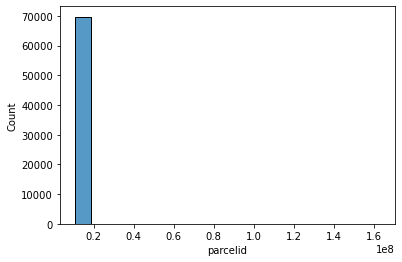

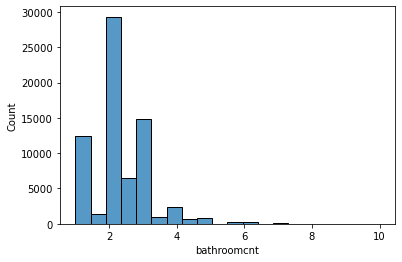

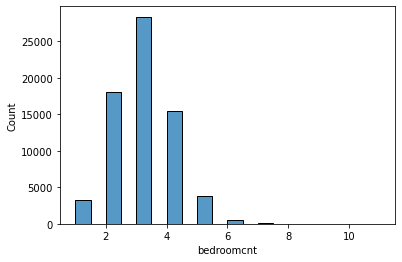

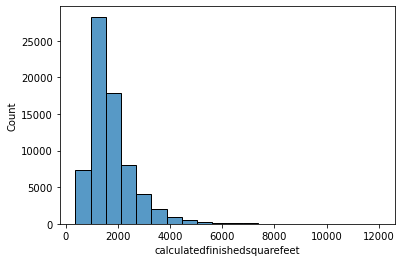

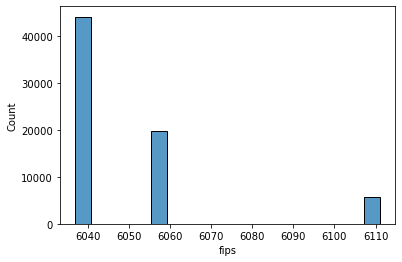

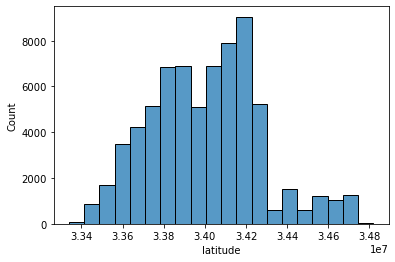

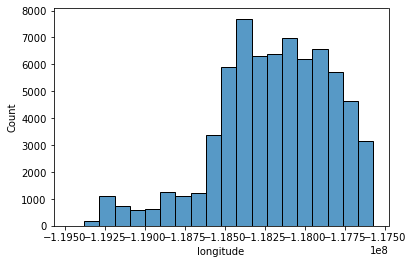

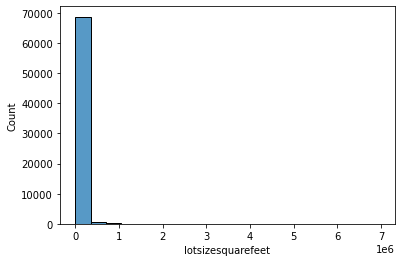

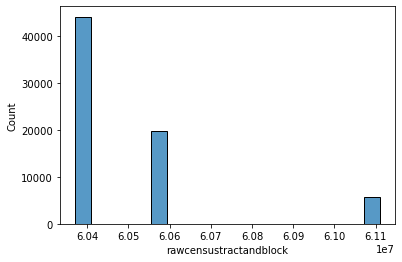

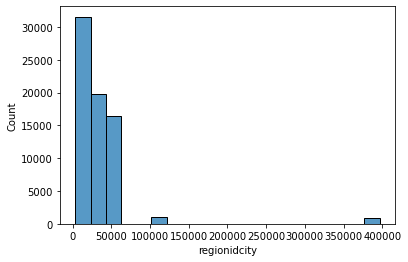

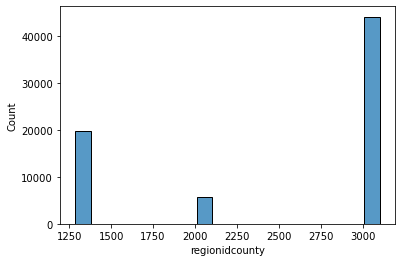

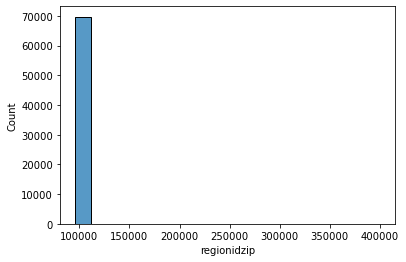

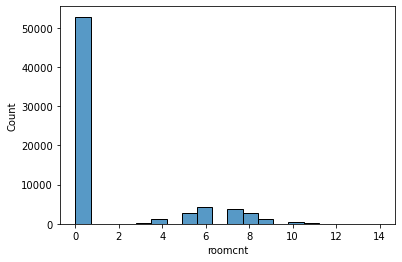

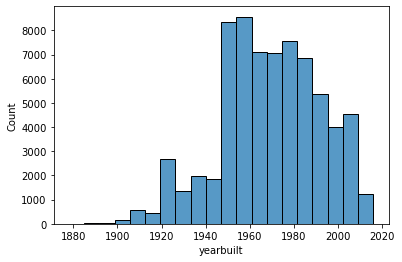

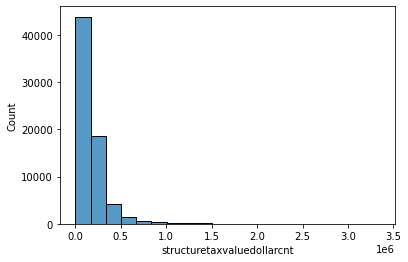

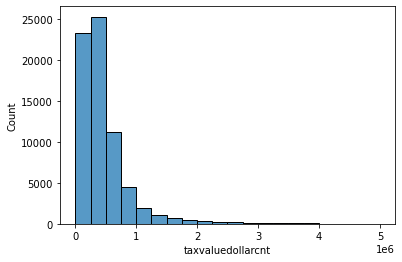

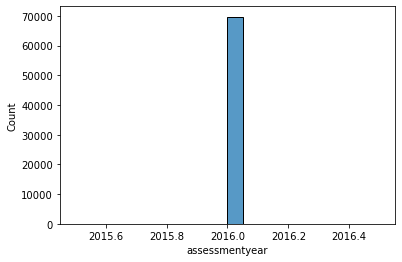

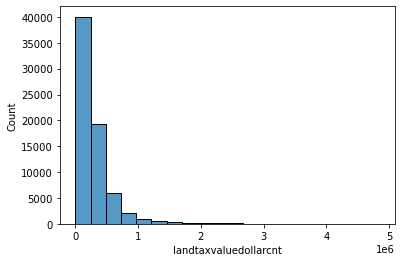

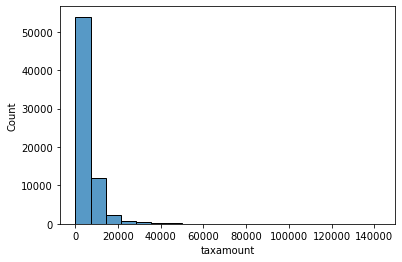

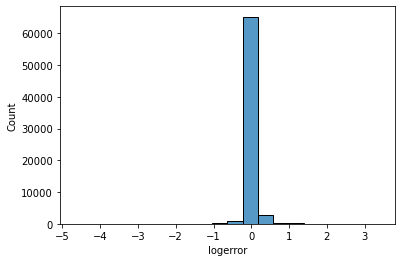

In [96]:
#Before split, use a loop to show the distribution of observations on only a single characteristic or attribute. 
quantitative_columns = [col for col in df.columns if df[col].dtype != 'object']

# for each of those columns:
for col in quantitative_columns:

        # display a histogram of that column's distribution
        sns.histplot(df[col], bins =20)
        plt.show()
    

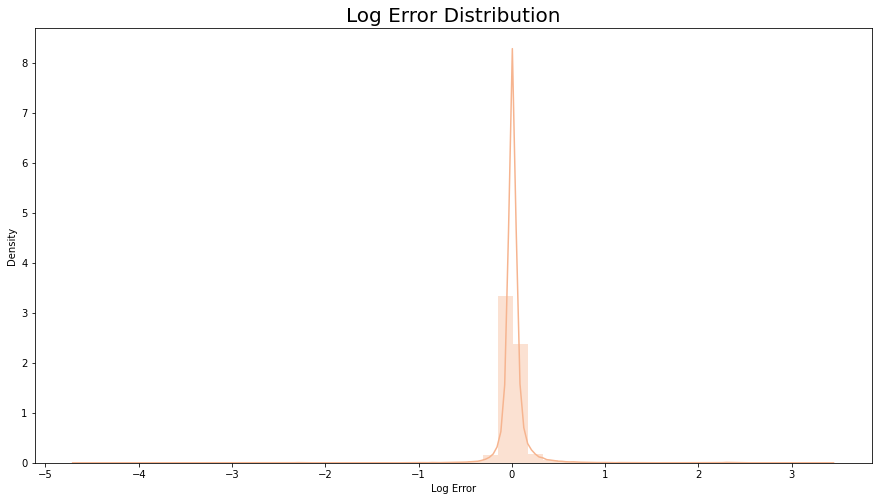

Takeawys: most of our log error are between -1 - 1. 
The min of logerror -4.65542037764
The max of logerror 3.39454406516
The mean of logerror 0.016636474473063333


In [55]:
#Plot again on the overall logerror distribution 
plt.figure(figsize=(15, 8)) #figure size
sns.distplot(df.logerror) #tell sns the feature that we would like to plot. 
plt.title('Log Error Distribution', fontsize=20)#set up the title 
plt.xlabel('Log Error')#set up the x label. 

plt.show()

print("Takeawys: most of our log error are between -1 - 1. ")
print(f'The min of logerror {df.logerror.min()}')
print(f'The max of logerror {df.logerror.max()}')
print(f'The mean of logerror {df.logerror.mean()}')

In [8]:
train, validate,test = dataprep.removed_outliers(df)
#Now import the train, validate and test function from dataprep.py

In [9]:
print(train.shape)
print(validate.shape)
print(test.shape)
#print out the shape to double check the size of each portion. 

(36482, 22)
(15636, 22)
(13030, 22)


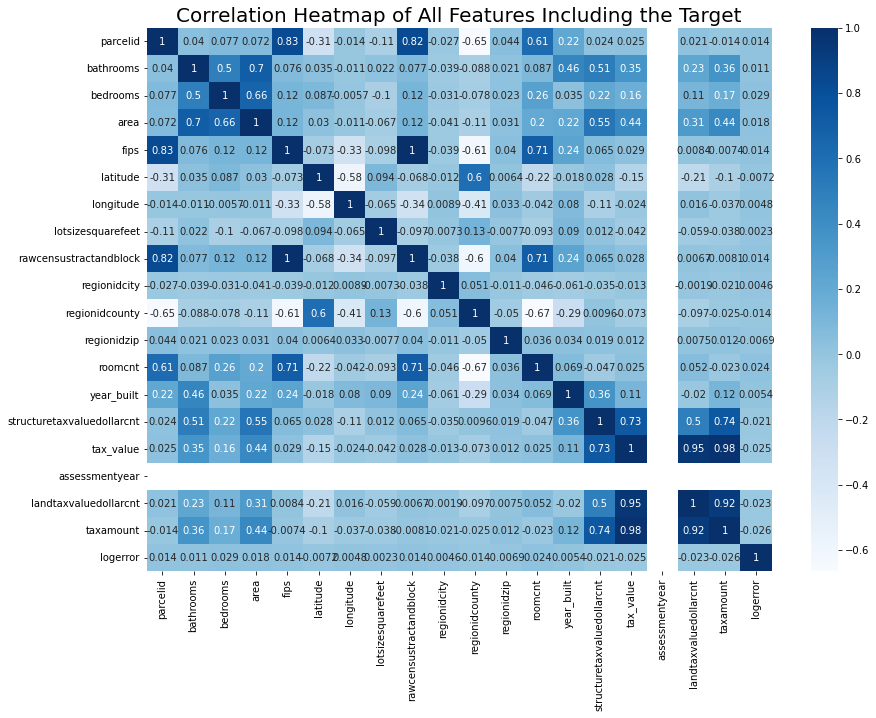

In [23]:
# Heatmap to display correlation of the features and logerror.
plt.figure(figsize=(14, 10))# set up the figure size. 
sns.heatmap(train.corr(), cmap='Blues', annot=True)# set up the heatmap, including color and annot. 
plt.title('Correlation Heatmap of All Features Including the Target', fontsize=20) # set upt the title and front size 
plt.show()

***Takeaways: The heatmap doesn't show any particulary high linear correlation but there could still be certain features that have more of an impact on the target variable***

### Let's take a closer look at some specific features :


## Question 1.
## Is logerror significantly different for properties in LA County vs Orange County?

In [ ]:
#H0: There is no difference in logerror between LA county vs Orange county. 
#H1: There is difference in logerror between LA county vs Orange county. 

In [8]:
train.county.value_counts() # LA has the most homes among all three counties.

Los_Angeles    23422
Orange         10145
Ventura         2915
Name: county, dtype: int64

<AxesSubplot:xlabel='county', ylabel='logerror'>

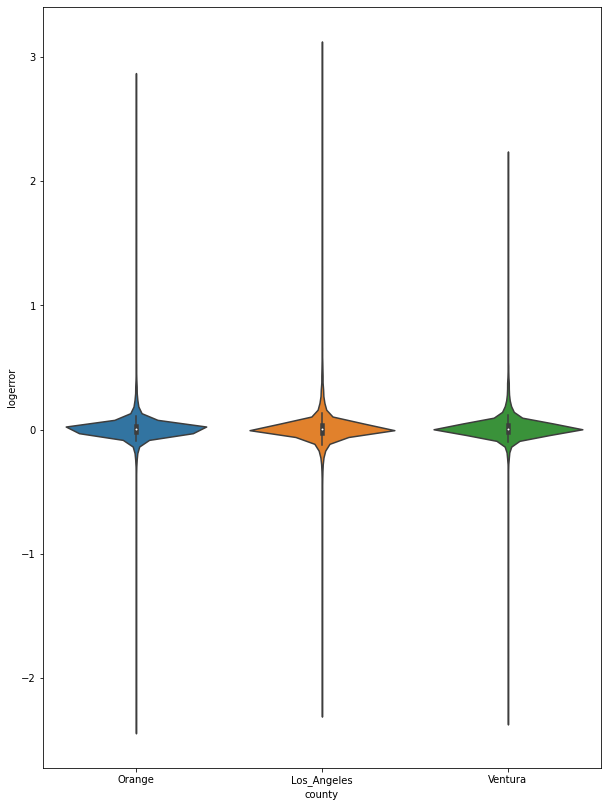

In [15]:
plt.figure(figsize=(10, 14))
sns.violinplot(x="county", y="logerror", data=train)
# frist, we can use violinplot to view the distribution between three counties. 

I'm unable to see the difference between three counties so I decided to run a test. 

In [72]:
#create subset to set up statstic test.
la_county = train[(train.county == "Los_Angeles")].logerror
orange_county = train[(train.county == 'Orange')].logerror 
ventura = train[(train.county == 'Ventura')].logerror

In [79]:
alpha = 0.01
#Reducing the alpha level from 0.05 to 0.01 reduces the chance of a 
#false positive (called a Type I error) but it also makes it harder to 
#detect differences with a t-test. Any significant results you might obtain would therefore 
#be more trustworthy but there would probably be less of them.
# Perform a anova test becuase we are comparsing three means,
# This is a three-sampled, two-tailed test. 
f, p = stats.f_oneway(la_county ,orange_county,ventura)
f, p
print(t, p)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

-2.4476712623583916 0.011398338453580893
We fail to reject the null hypothesis


***Takeaway: We can't say that we have confidence that there is difference for logerror in LA County vs Orange County.***

## Question 2.
## Do year_built related with logerror? 

In [ ]:
#H0:There is no relationship between logerror and year_built.
#H1: There is relationship between logerror and year_built. 

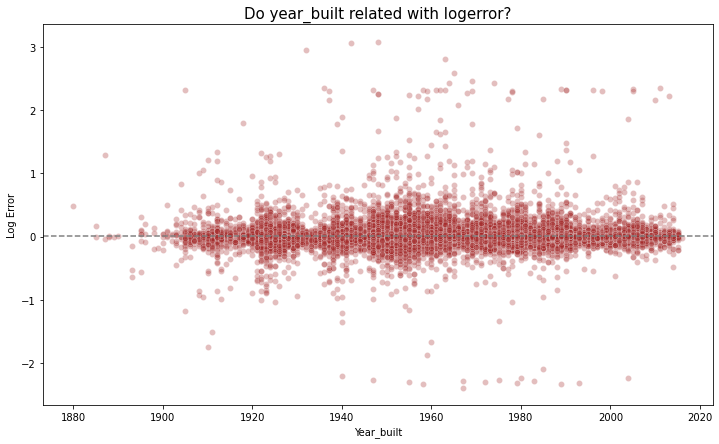

In [45]:
#first, we can create a scatterplot to see the distribution.  
plt.figure(figsize=(12,7)) # set up the figure size. 
sns.scatterplot(x='year_built', y='logerror', data=train,alpha=.3, color ='brown')# set up the x and y. 

mean1 = train.logerror.mean()# draw a logerror mean line 
plt.axhline(mean1, ls='--', color='grey')# set up the color and style

plt.xlabel('Year_built') # lable x 
plt.ylabel('Log Error')# lable y
plt.title('Do year_built related with logerror?',fontsize=15)# add title and set up fontsize. 
plt.show()

I'm unable to see the difference the relationship between year built and logerror, so I will run a test. 

In [74]:
# Perform a corr test because both features are continuous features. 
alpha = 0.05 # set up the alpha = 0.05 as normal. 
corr, p = stats.pearsonr(train.logerror, train.year_built)
print(corr, p)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

0.005400631496055583 0.3023031599335249
We fail to reject the null hypothesis


***Takeaways: We can't say that we have confidence to say year_built are related with logerror.***

## Question 3.
## Does the area of a home impact on logerror?

In [62]:
#H0:There is no relationship between logerror and area.
#H1: There is relationship between logerror and area. 

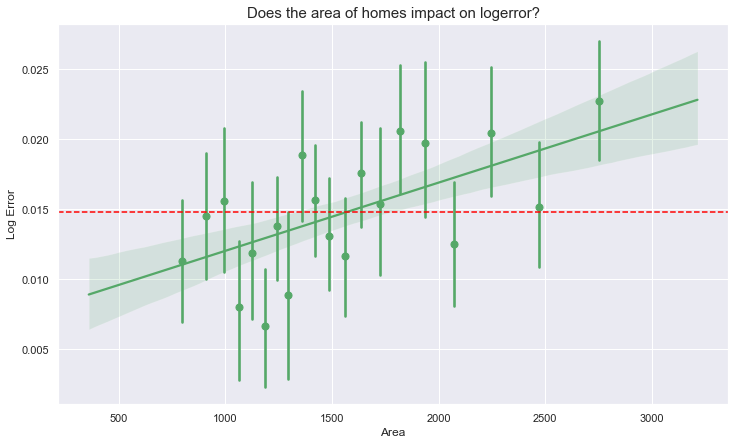

In [127]:
#Plot data and a linear regression model fit the area and logerror. 
plt.figure(figsize=(12,7))#set up the figure size.
sns.regplot(x=train.area, y=train.logerror, x_bins=20,ci=80, color = 'g')
# regplot can use on continuous feature by creating couple bins, 
#CI is  Size of the confidence interval for the regression estimate.I set to 80%, just to take a look the overall trend. 
plt.xlabel('Area')# set up the x axis. 
plt.ylabel('Log Error')# set up the y axis
plt.title('Does the area of homes impact on logerror?',fontsize=15) # set up the title and fontsize. 
mean1 = train.logerror.mean()# draw the mean of the logerror. 
plt.axhline(mean1, ls='--', color='red')
plt.show()

0

Looks like there is a linear relationship between area and logerror, let's run a test to further approve it. 

In [75]:
# Perform a corr test because both features are continuous features. 
corr, p = stats.pearsonr(train.logerror, train.area)
print(corr, p)
if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

0.018230903523404944 0.0004970886068872772
We reject the null hypothesis


***Takeaways: We have confidence to say there is a linear relationship between area and logerror.***

## Question 4: 
## Does bedroom count impact log error?

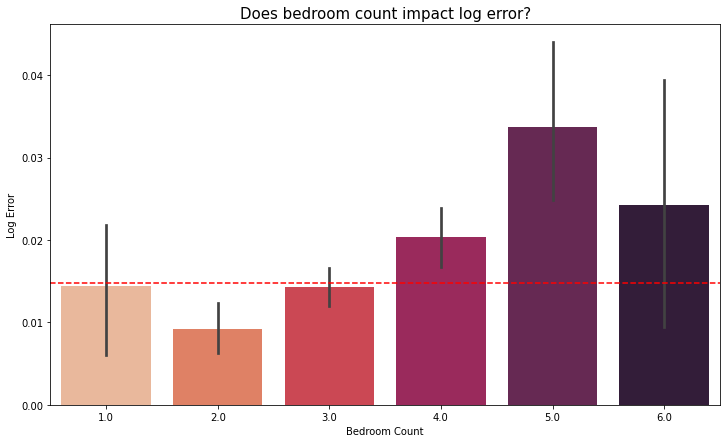

In [44]:

plt.figure(figsize=(12,7))
sns.set_palette(sns.color_palette("rocket_r"))
#with sns.color_palette("Blues"):
sns.barplot(x='bedrooms', y='logerror', data=train)
plt.xlabel('Bedroom Count')
plt.ylabel('Log Error')
plt.title('Does bedroom count impact log error?',fontsize=15)
mean1 = train.logerror.mean()
plt.axhline(mean1, ls='--', color='red')

plt.show()

Looks like homes with less bedrooms counts tend to produce smaller log error, bedrooms with 5 and 6 bedrooms counts have highestlogerror.let's run a t test to compare. 

In [81]:
#create subsets to use t test. 
less_bedrooms = train[(train.bedrooms <=3)].logerror
more_bedrooms = train[(train.bedrooms > 3)].logerror 

In [82]:
# Perform a t test becuase we are comparsing two means,
# This is a two-sampled, two-tailed test. 
t, p = stats.ttest_ind(less_bedrooms,more_bedrooms, equal_var=False )
print(t, p)
if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

-5.103803881956084 3.37071365027959e-07
We reject the null hypothesis


***Takeaways: We have confidence to say that homes with less bedrooms counts tend to produce smaller log error***

## Question 5.
## What are the area that we are focusing on? 

In [87]:
# Extract the data we're interested in, reset the original longtitude and latitude by /100000
train.latitude = train.latitude/1000000
train.longtitude = train.longitude/1000000

<Figure size 1080x504 with 0 Axes>

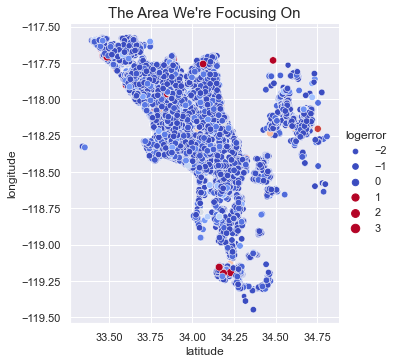

In [123]:
norm = plt.Normalize(vmin=0,vmax=1)
#plot the original lon and lat, to see the area. 
plt.figure(figsize=(15,7))#set up the scatter. 
sns.set(rc={'figure.figsize':(15,8.27)})
sns.relplot(train.latitude, train.longtitude, hue=train.logerror, size = train.logerror,palette='coolwarm',hue_norm=norm)
plt.title("The Area We're Focusing On", fontsize=15)
plt.show()

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Text(0.5, 1.0, "The Area We're Focusing On")

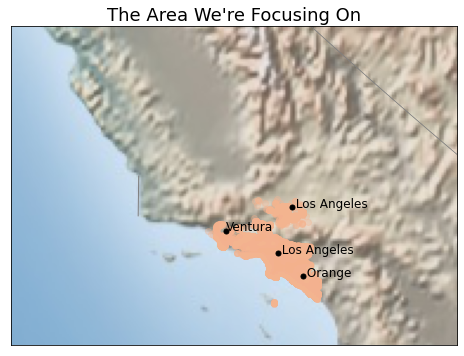

In [48]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='gnom', resolution='c', 
            lat_0=35, lon_0=-119,
            width=0.7E6, height=0.5E6)


m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.scatter(lon, lat, latlon=True,
          
          cmap='Reds', alpha=0.3)


x, y = m(-118.2437, 34.0522)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Los Angeles', fontsize=12);


x2, y2 = m(-117.8311, 33.7175)
plt.plot(x2, y2, 'ok', markersize=5)
plt.text(x2, y2, ' Orange', fontsize=12);



x3, y3 = m(-119.1391, 34.3705)
plt.plot(x3, y3, 'ok', markersize=5)
plt.text(x3, y3, 'Ventura', fontsize=12);


x4, y4 = m(-118, 34.7)
plt.plot(x4, y4, 'ok', markersize=5)
plt.text(x4, y4, ' Los Angeles', fontsize=12);
plt.title("The Area We're Focusing On", fontsize=18)


Takeaways: 